# IMPORT

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# INFO

In [453]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SAA/DATASETS/cereal.csv")

In [454]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


# PREPARACION DATOS

### CORRELATION

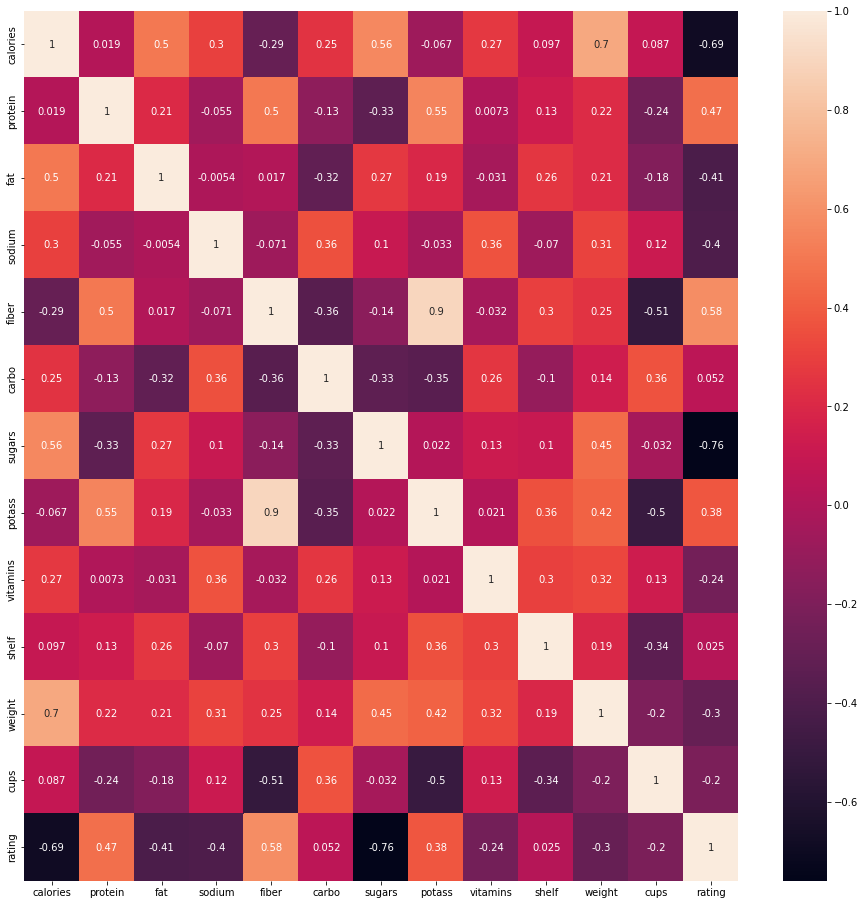

In [456]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(method="pearson"),annot=True)

# TRAIN & FIT 

In [457]:
nombres=df["name"]

In [458]:
y=df["rating"]

In [459]:
X=df[["calories","fiber","sugars"]]

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### SCORE

In [461]:
model.score(X_test, y_test)

0.8372320352412295

### VISUALIZATION

In [462]:
data=pd.DataFrame(data=nombres)
y_pred=model.predict(X)
data["rating_real"]=df["rating"]
data["rating_prediction"]=y_pred
data

,name,rating_real,rating_prediction
0,100% Bran,68.402973,71.246255
1,100% Natural Bran,33.983679,37.417330
2,All-Bran,59.425505,70.548733
3,All-Bran with Extra Fiber,93.704912,96.077829
4,Almond Delight,34.384843,36.998564
...,...,...,...
72,Triples,39.106174,43.462366
73,Trix,27.753301,27.349387
74,Wheat Chex,49.787445,52.995013
75,Wheaties,51.592193,52.995013
